# Task 4: Group Task

### Spain as country

In [252]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy as cp
import cartopy.crs as ccrs
from atlite.gis import ExclusionContainer
from atlite.gis import shape_availability
from rasterio.plot import show
from shapely.ops import unary_union
from shapely import multipolygons
import rasterio
import atlite

In [60]:
file = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2F&files=country_shapes.geojson"
shapes = gpd.read_file(file).set_index('name')

In [61]:
spain = shapes.query("index == 'ES'").to_crs(3035).geometry
spain.explore()

In [62]:
regions = "https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgadm&files=gadm_410-levels-ADM_1-ESP.gpkg"
regions = gpd.read_file(regions)

In [222]:
#delete islands
#regions =regions.drop(12)
#regions = regions.drop(13)
regions = regions.drop(6)

In [223]:
regions.explore()

### create 5 zones for the analysis:

In [237]:
regions['zone'] = 0
for i in regions.geometry.index:
    if i in [0,17]:
        regions['zone'][i] = 1
    if i  in [3,7,9,10]:
            regions['zone'][i] = 2
    if i in [1,5]:
            regions['zone'][i] = 3
    if i in [2,4,8,14,15,15,16]:     
            regions['zone'][i] = 4
    if i in [11]:     
            regions['zone'][i] = 5
regions.append({'zone':6, 'geometry': '', 'GID_1':'ESP.5_1','COUNTRY': 'Spain','NAME_1': 'EEZ'}, ignore_index=True)

C:\Users\leoni\AppData\Local\Temp\ipykernel_11880\598852289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['zone'][i] = 1
C:\Users\leoni\AppData\Local\Temp\ipykernel_11880\598852289.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['zone'][i] = 3
C:\Users\leoni\AppData\Local\Temp\ipykernel_11880\598852289.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['zone'][i] = 4
C:\Users\leoni\AppData\Local\Temp

GID_0     GID_1 COUNTRY                      NAME_1  \
0    ESP   ESP.1_1   Spain                   Andalucía   
1    ESP   ESP.2_1   Spain                      Aragón   
2    ESP   ESP.3_1   Spain                   Cantabria   
3    ESP   ESP.4_1   Spain          Castilla-La Mancha   
4    ESP   ESP.5_1   Spain             Castilla y León   
5    ESP   ESP.6_1   Spain                    Cataluña   
6    ESP   ESP.8_1   Spain         Comunidad de Madrid   
7    ESP   ESP.9_1   Spain  Comunidad Foral de Navarra   
8    ESP  ESP.10_1   Spain        Comunidad Valenciana   
9    ESP  ESP.11_1   Spain                 Extremadura   
10   ESP  ESP.12_1   Spain                     Galicia   
11   ESP  ESP.15_1   Spain                    La Rioja   
12   ESP  ESP.16_1   Spain                  País Vasco   
13   ESP  ESP.17_1   Spain      Principado de Asturias   
14   ESP  ESP.18_1   Spain            Región de Murcia   
15   NaN   ESP.5_1   Spain                         EEZ   

                                             geometry  zone  
0   MULTIPOLYGON (((-3.031249999999943 35.94069300...     1  
1   MULTIPOLYGON (((-0.8168969749999064 39.8985824...     3  
2   MULTIPOLYGON (((-3.936292999999978 42.90813400...     4  
3   MULTIPOLYGON (((-1.4523129469998253 38.5818176...     2  
4   MULTIPOLYGON (((-5.621010780999939 40.24144745...     4  
5   MULTIPOLYGON (((0.4380089930000963 40.54708480...     3  
6   MULTIPOLYGON (((-3.8729209899998978 39.9090385...     2  
7   MULTIPOLYGON (((-1.6109079999998244 41.9465360...     4  
8   MULTIPOLYGON (((-0.7523609989999045 37.8865280...     2  
9   MULTIPOLYGON (((-6.063850423999952 37.98960247...     2  
10  MULTIPOLYGON (((-7.527213096999958 41.84021759...     5  
11  MULTIPOLYGON (((-2.0861680509999587 41.9543952...     4  
12  MULTIPOLYGON (((-2.6564869879999264 42.5040435...     4  
13  MULTIPOLYGON (((-6.556736321999892 42.91375077...     4  
14  MULTIPOLYGON (((-0.9681950009999696 37.5581050...     1  
15                                                        6

In [230]:
#add eez
EEZ = gpd.read_file("eez_v11.gpkg")
# Extract EEZ of Spain
EEZ_Spa = EEZ[EEZ['GEONAME'] == 'Spanish Exclusive Economic Zone']

In [254]:
EEZ_Spa['geometry']

276    MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0...
Name: geometry, dtype: geometry

In [275]:
#multipolygons(EEZ_Spa.geometry, indices=None)

In [276]:
#zones['geometry'][15] = EEZ_Spa.geometry

In [269]:
#order by zones
zones = regions.dissolve(by = 'zone')
#zones.append({'zone':6, 'geometry': EEZ_Spa.geometry, 'GID_0':'ESP.5_1','COUNTRY': 'Spain','Name': 'EEZ'}, ignore_index=True)

<Axes: >

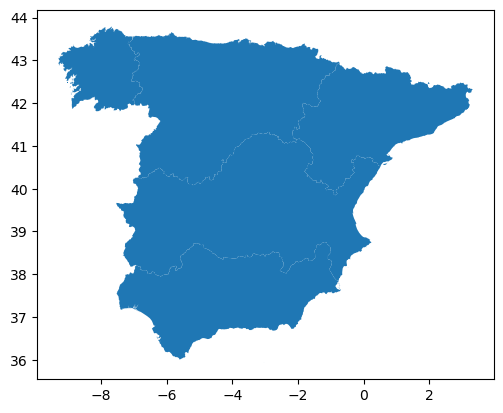

In [271]:
zones.plot()

In [185]:
#mit dissolve lösen? erst eez hinzufügen, dann extra spalte mit zone1-17, dann regions.dissolve(by = 'zone') dann macht er da so ein anderes objekt draus und das ist nicht diese shapely kacke

In [177]:
geometries = [zone1,zone2,zone3,zone4,zone5,EEZ_Coo]
names = ['zone_1','zone_2','zone_3','zone_4','zone_5','EEZ']
geometries
#zones = gpd.GeoDataFrame(names, geometry = geometries)

[<MULTIPOLYGON (((-6.313 36.528, -6.313 36.527, -6.317 36.527, -6.317 36.527,...>,
 <MULTIPOLYGON (((-0.458 38.162, -0.458 38.161, -0.459 38.161, -0.459 38.161,...>,
 <MULTIPOLYGON (((0.733 40.779, 0.733 40.779, 0.733 40.778, 0.734 40.778, 0.7...>,
 <MULTIPOLYGON (((-5.66 40.257, -5.656 40.27, -5.683 40.284, -5.693 40.292, -...>,
 <MULTIPOLYGON (((-8.932 42.345, -8.932 42.345, -8.932 42.345, -8.932 42.345,...>,
 276    MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0...
 Name: geometry, dtype: geometry]

In [268]:
#add center for analysis
zones_center = zones.to_crs(3035)
zones['center'] = zones_center.geometry.centroid
zones

geometry GID_0     GID_1  \
zone                                                                      
1     MULTIPOLYGON (((2859403.116 1651602.067, 28593...   ESP   ESP.1_1   
2     MULTIPOLYGON (((3401226.560 1738621.882, 34012...   ESP   ESP.4_1   
3     MULTIPOLYGON (((3537302.977 2012517.192, 35373...   ESP   ESP.2_1   
4     MULTIPOLYGON (((2992784.137 2044654.406, 29933...   ESP   ESP.3_1   
5     MULTIPOLYGON (((2774369.212 2333750.502, 27743...   ESP  ESP.12_1   

     COUNTRY              NAME_1                           center  
zone                                                               
1      Spain           Andalucía  POINT (3062303.380 1724020.673)  
2      Spain  Castilla-La Mancha  POINT (3157636.548 1928168.781)  
3      Spain              Aragón  POINT (3504944.379 2112057.689)  
4      Spain           Cantabria  POINT (3133547.173 2224782.700)  
5      Spain             Galicia  POINT (2866014.032 2357678.136)

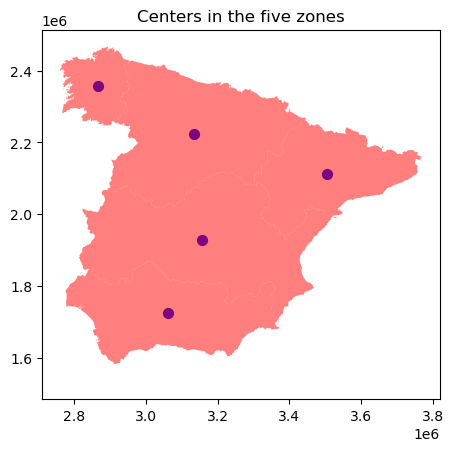

In [266]:
fig, ax = plt.subplots()

# Plot the points
zones.center.plot(ax=ax, color='blue', markersize=50)
point_color = (1, 0, 0, 0.5)
zones.geometry.plot(ax=ax, color=point_color )
ax.set_title("Centers in the five zones")

# Display the plot
plt.show()

### First, perform a land eligibility analysis
- onshore wind:
- 10km distance to airports
- 300m distance to major roads
- no natural protection areas
- maximum elevation of 2000m
- 1000m distance to built up areas
- only on suitable land cover classes

In [65]:
def plot_area(masked, transform, shape):
    fig, ax = plt.subplots(figsize=(5,5))
    ax = show(masked, transform=transform, cmap='Greens', vmin=0, ax=ax)
    shape.plot(ax=ax, edgecolor='k', color='None', linewidth=1)

In [284]:
file_roads = 'ne_10m_roads.gpkg'
file_airport = 'ne_10m_airports.gpkg'
file_clases = 'PROBAV_LC100_global_v3.0.1_2019-nrt_Discrete-Classification-map_EPSG-4326-ES.tif'
#file_elevation = 'https://tubcloud.tu-berlin.de/s/567ckizz2Y6RLQq/download?path=%2Fgebco&files=GEBCO_2014_2D-ES.nc'
file_elevation = 'GEBCO_2014_2D-ES.nc'
file_protected = 'WDPA_Oct2022_Public_shp-ESP.tif'
weather_data = 'era5-2020-ES.nc'
land = zones.to_crs(3035).geometry

In [274]:
spain

name
ES    MULTIPOLYGON (((3368439.798 2321843.493, 33692...
Name: geometry, dtype: geometry

In [278]:
#exclude roads and airports:
excluder = ExclusionContainer(crs=3035,res =500) #delete 'res' when its working
clc = rasterio.open(file_clases)
band = clc.read()

In [285]:
area.plot

<bound method GeoSeries.plot of zone
1    MULTIPOLYGON (((2859403.116 1651602.067, 28593...
2    MULTIPOLYGON (((3401226.560 1738621.882, 34012...
3    MULTIPOLYGON (((3537302.977 2012517.192, 35373...
4    MULTIPOLYGON (((2992784.137 2044654.406, 29933...
5    MULTIPOLYGON (((2774369.212 2333750.502, 27743...
Name: geometry, dtype: geometry>

<Axes: >

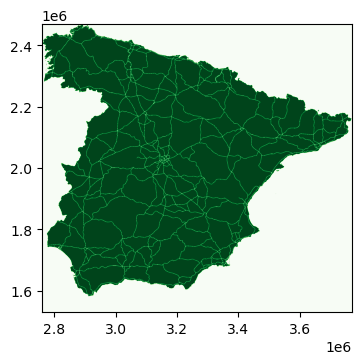

In [286]:
#roads
#area = spain
excluder.add_geometry(file_roads, buffer = 300)
band, transform = shape_availability(land, excluder)
fig, ax = plt.subplots(figsize=(4,5))
zones.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

<Axes: >

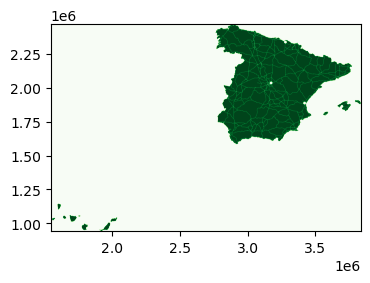

In [70]:
#airports
excluder.add_geometry(file_airport, buffer = 10000)
band, transform = shape_availability(land, excluder)
fig, ax = plt.subplots(figsize=(4,5))
zones.plot(ax=ax, color='none')
show(band, transform=transform, cmap='Greens', ax=ax)

<Axes: >

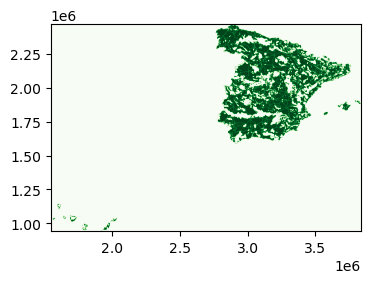

In [71]:
#exclude natural protected areas
excluder.add_raster(file_protected,crs=3035)
masked, transform = shape_availability(land, excluder)
fig, ax = plt.subplots(figsize=(4,5))
zones.plot(ax=ax, color='none')
show(masked, transform=transform, cmap='Greens', ax=ax)

<Axes: >

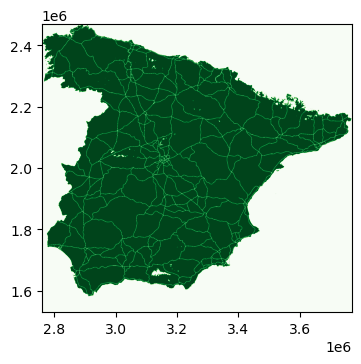

In [287]:
#elevation higher than 2000m:???
excluder.add_raster(file_elevation, codes = lambda x: x<2000, crs = 4326, invert=True)
masked, transform = shape_availability(land, excluder)
fig, ax = plt.subplots(figsize=(4,5))
zones.plot(ax=ax, color='none')
show(masked, transform=transform, cmap='Greens', ax=ax)

In [ ]:
#land clases


In [ ]:
#analysis of capacity factor

### Offshore Wind
- within EEZ
- up to water depth of 50m
- no natural protection areas
- 10km minimum distance to shore

In [257]:
# Load EEZ
EEZ = gpd.read_file("eez_v11.gpkg")

# Extract EEZ of Spain and change CRS
EEZ_Spa = EEZ[EEZ['GEONAME'] == 'Spanish Exclusive Economic Zone']

In [258]:
EEZ.geometry

0      MULTIPOLYGON (((-166.64112 -17.55527, -166.641...
1      MULTIPOLYGON (((-10.93328 -7.88745, -10.93324 ...
2      MULTIPOLYGON (((-159.27579 -5.80051, -158.3846...
3      MULTIPOLYGON (((-58.54196 -56.22782, -61.62049...
4      MULTIPOLYGON (((-135.93245 -7.89001, -135.9290...
                             ...                        
276    MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0...
277    MULTIPOLYGON (((75.83452 -5.23039, 75.83260 -5...
278    MULTIPOLYGON (((-37.13953 -50.64608, -37.03619...
279    MULTIPOLYGON (((-60.70499 32.39114, -60.70499 ...
280    MULTIPOLYGON (((-67.28418 45.19126, -67.28403 ...
Name: geometry, Length: 281, dtype: geometry

<Axes: >

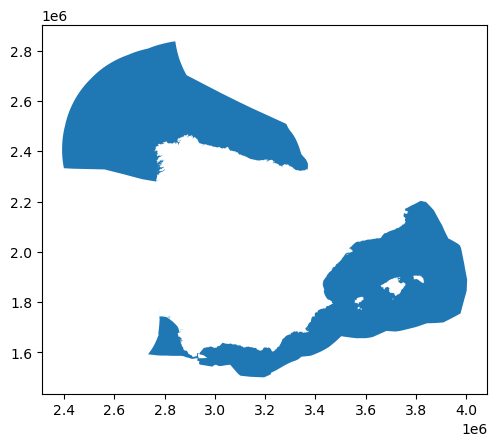

In [144]:
EEZ_Spa.geometry.to_crs(3035).plot()

#### --> use this EEZ zone as one zone for offshore generation calculation

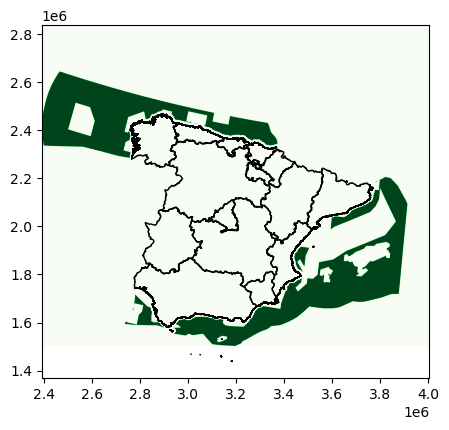

In [145]:
# Land eligibility for offshore wind
# define excluder to get eligible area
excluder_offwind = ExclusionContainer(crs=3035, res=300)

# Exclude protected areas
fn = file_protected
excluder_offwind.add_raster(fn, crs=3035)

#Exclude 10km  distance to shore
excluder_offwind.add_geometry(regions, buffer=10000)

# Exclude elevation < -50 m
fn = file_elevation
excluder_offwind.add_raster(fn, codes= lambda x: x>-50, crs=4326)

masked, transform = shape_availability(EEZ_Spa.geometry.to_crs(3035), excluder_offwind)
plot_area(masked, transform, regions.to_crs(3035).geometry)

### Second, using atlite download historical weather data from the ERA5 dataset into an atlite.
Cutout as shown in the lecture for a year of your choice and the geographical bounds of your selected country (add a buffer of 0.25 degrees).
Then, together with the availability matrix and the corresponding atlite conversion functions, calculate
the wind and solar capacity factor time series per modelled region.
For offshore wind, use a "NREL_ReferenceTurbine_5MW_offshore" as reference turbine.

In [79]:
cutout = atlite.Cutout('era5-2020-ES.nc') #new data for offshore necessary
cutout.data

<xarray.Dataset>
Dimensions:           (x: 53, y: 34, time: 8784)
Coordinates:
  * x                 (x) float64 -9.5 -9.25 -9.0 -8.75 ... 2.75 3.0 3.25 3.5
  * y                 (y) float64 35.75 36.0 36.25 36.5 ... 43.5 43.75 44.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(53,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 dask.array<chunksize=(34, 53), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'influx', 'wind', 'runoff', 'temperature']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-07-12 16:45:58 GMT by grib_to_netcdf-2.25.1: /op...

#### use "NREL_ReferenceTurbine_5MW_offshore" as reference turbine
- hubhight 90m 
- assume z_0 for Open sea = 0.0002

In [81]:
wnd100m = cutout.data.wnd100m.mean(dim='time')

In [108]:
#get roughness and wind speed at 100m for calculation of wind speed
z_r = cutout.data.roughness
wnd100m = cutout.data.wnd100m

In [99]:
#calculate wind speed using log law at hub hight of 90m
wnd90m = wnd100m * np.log(90 / z_r) / np.log(100 / z_r) 

<GeoAxes: xlabel='x', ylabel='y'>

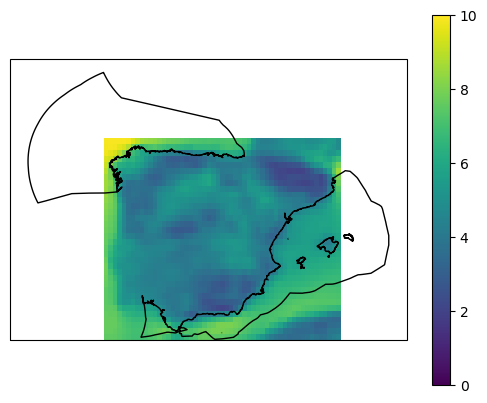

In [106]:
ax = plt.axes(projection=ccrs.PlateCarree())

wnd90m.mean(dim='time').plot(ax=ax, vmin=0, vmax=10)

EEZ_Spa.to_crs(4326).plot(ax=ax, edgecolor='black', color='none')

In [146]:
A_offwind = cutout.availabilitymatrix(EEZ_Spa, excluder_offwind)

Compute availability matrix: 100%|███████████████████████████████████████████████| 1/1 [00:17<00:00, 17.57s/ gridcells]


In [147]:
#calculate the capacity factors using the wind speed in the availability matrix: 
import xarray as xr

cap_per_sqkm = 3
area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6
area = xr.DataArray(area, dims=('spatial'))

capacity_matrix = A_offwind.stack(spatial=['y', 'x']) * area * cap_per_sqkm

In [149]:
#calculate the capacity factor time series for spain:
cutout.prepare()
wind = cutout.wind(matrix=capacity_matrix, turbine="NREL_ReferenceTurbine_5MW_offshore", index = EEZ_Spa.index)
#EEZ_Spa

MRGID                          GEONAME  MRGID_TER1 POL_TYPE  MRGID_SOV1  \
276  5693.0  Spanish Exclusive Economic Zone      2185.0    200NM      2185.0   

    TERRITORY1 ISO_TER1 SOVEREIGN1  MRGID_TER2  MRGID_SOV2  ... ISO_SOV1  \
276      Spain      ESP      Spain         0.0         0.0  ...      ESP   

    ISO_SOV2 ISO_SOV3  UN_SOV1  UN_SOV2 UN_SOV3 UN_TER1 UN_TER2  UN_TER3  \
276      NaN      NaN      724      NaN     NaN   724.0     NaN      NaN   

                                              geometry  
276  MULTIPOLYGON (((4.54375 42.44867, 4.86147 42.0...  

[1 rows x 32 columns]

In [ ]:
#add data to dataframe with regions --> sort that data orrectly! put zones in a frame that can be used and calculated with and add eez zone
#not ready yet
masked, transform = shape_availability(area, excluder_offwind)
eligible_cells = masked.sum()
cell_area = excluders_offwind.res**2/1e6
eligible_area = abs(cell_area * eligible_cells)
zones['Potential Offshore wind [MW]']['EEZ']=cap_per_sqkm*eligible_area
for i in regions.index:
    regions['Potential offshore wind [MW]'][i]=0

In [ ]:
#tabelle mit allen zonen, in denen die potentiale zusammengefasst werden können, vielleicht ohne geometry

### Solar (rooftop & utility)
- only on suitable land cover classes
- no natural protection areas

### land cover clases: 

0:  no valid input data
20: Shrubs
30: herbaceous vegetation
40: Cultivated and managed vegetation/agriculture (cropland)
60: bare/sparse vegetation
90: Herbaceous wetland
50: Urban / built up

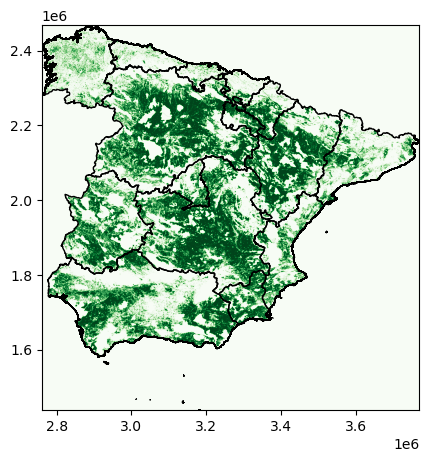

In [40]:
# Solar land eligibility

# Define excluder to get eligible area
excludersolar = ExclusionContainer(crs=3035, res=300)

# Only include suitable land classes
fn = file_clases
codes_solar=[0,20,30,40,60,90]
excludersolar.add_raster(fn, codes=codes_solar, crs=4326, invert=True)
# Exclude protected areas
fn = file_protected
excludersolar.add_raster(fn, crs=3035)
# Compute eligible area for solar
masked, transform = shape_availability(regions.to_crs(3035).geometry, excludersolar)
# Plot eligible area
# function to plot the exclusions (from excercise: Preparation for Group Assignment)

plot_area(masked, transform, regions.to_crs(3035).geometry)


## Second, using atlite download historical weather data from the ERA5 dataset into an atlite. 

Cutout as shown in the lecture for a year of your choice and the geographical bounds of your selected country (add a buffer of 0.25 degrees).

In [21]:
cutout = atlite.Cutout('era5-2020-ES.nc')
cutout.data

<xarray.Dataset>
Dimensions:           (x: 53, y: 34, time: 8784)
Coordinates:
  * x                 (x) float64 -9.5 -9.25 -9.0 -8.75 ... 2.75 3.0 3.25 3.5
  * y                 (y) float64 35.75 36.0 36.25 36.5 ... 43.5 43.75 44.0
  * time              (time) datetime64[ns] 2020-01-01 ... 2020-12-31T23:00:00
    lon               (x) float64 dask.array<chunksize=(53,), meta=np.ndarray>
    lat               (y) float64 dask.array<chunksize=(34,), meta=np.ndarray>
Data variables: (12/13)
    height            (y, x) float32 dask.array<chunksize=(34, 53), meta=np.ndarray>
    wnd100m           (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    wnd_azimuth       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    roughness         (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_toa        (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    influx_direct     (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    ...                ...
    albedo            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_altitude    (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    solar_azimuth     (time, y, x) float64 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    temperature       (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    soil temperature  (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
    runoff            (time, y, x) float32 dask.array<chunksize=(100, 34, 53), meta=np.ndarray>
Attributes:
    module:             era5
    prepared_features:  ['height', 'influx', 'wind', 'runoff', 'temperature']
    chunksize_time:     100
    Conventions:        CF-1.6
    history:            2023-07-12 16:45:58 GMT by grib_to_netcdf-2.25.1: /op...

<Axes: >

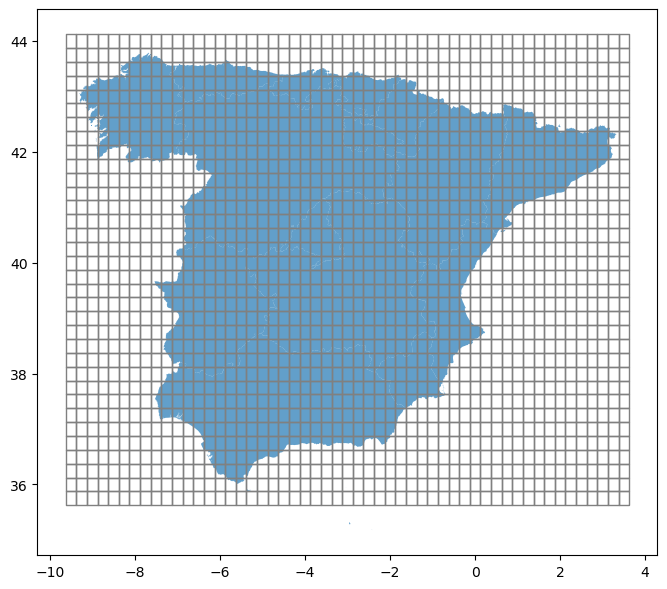

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
regions.to_crs(4326).plot(ax=ax,alpha = 0.7,)
cutout.grid.plot(ax=ax, edgecolor='grey', color='None')

In [30]:
A_onsolar = cutout.availabilitymatrix(area, excludersolar)

Compute availability matrix: 100%|█████████████████████████████████████████████| 16/16 [00:03<00:00,  4.28 gridcells/s]


In [31]:
#from isis course rasterio part  
cap_per_sqkm = 3

# Comppute area of provinces
area = cutout.grid.set_index(['y', 'x']).to_crs(3035).area / 1e6
area = xr.DataArray(area, dims=('spatial'))
# Compute onwind capacity matrix

capacity_matrix_solar = A_onsolar.stack(spatial=['y', 'x']) * area * cap_per_sqkm

NameError: name 'xr' is not defined